# Математичекая Статистика
## Лабораторная Работа №3 «Статистические Гипотезы», Вариант 5

Румянцев Алексей Александрович, 368731, Поток Мат Стат 31.2

### Условие задания

Для каждой проблемы нужно провести два статистических теста, если не сказано иное, причем первый из критериев нужно реализовать самостоятельно (считать и выводить значение статистики, критическое значение, `p-value`), в качестве второго можно воспользоваться готовой реализацией. Также нужно отдельно указывать, как формализуются $Н_0$ и $Н_1$ для выбранных тестов. Уровень значимости выбираете сами.

В файле [`song_data.csv`](https://drive.google.com/file/d/1KRbKtVb6Xkyc8_2gKT9G6N5N_yD7FQXC/view) представлены данные о музыкальных произведениях
1. Предположите с каким вероятностным законом распределен рейтинг песни. С помощью стат. теста подтвердите/опровергните это предположение.
2. Верно ли, что распределение рейтинга у коротких и длинных песен одинаково (порог продолжительности выбирайте сами)?
3. Верно ли, что рейтинг и танцевальность связаны?

### Выполнение

[Источник 1](http://www.machinelearning.ru/wiki/index.php?title=%D0%9F%D1%80%D0%BE%D0%B2%D0%B5%D1%80%D0%BA%D0%B0_%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D1%85_%D0%B3%D0%B8%D0%BF%D0%BE%D1%82%D0%B5%D0%B7), [Источник 2](https://ru.wikipedia.org/wiki/%D0%9D%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5), [Источник 3](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html), [Источник 4](https://cdn.scribbr.com/wp-content/uploads/2022/05/chi-square-distribution-table.png), [Источник 5](http://www.mathprofi.ru/koefficient_rangovoy_korrelyacii_spirmena.html), [Источник 6](https://univer-nn.ru/ekonometrika/test-spirmena/)

In [988]:
ACCEPT = "Accept null hypothesis"
REJECT = "Reject null hypothesis with respect to given alternative"

def print_reject_or_accept(condition):
  if condition:
    print(REJECT)
  else:
    print(ACCEPT)

In [989]:
from pathlib import Path
import os

import pandas as pd


path = Path().resolve()
filename = 'song_data.csv'
data = pd.read_csv(os.path.join(path, filename))
data

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


1. H_0 -- нормальное

In [990]:
ratings = data['song_popularity']
n = len(ratings)
n

18835

In [991]:
import numpy as np

k = int(1 + np.floor(np.log2(n)))
k

15

In [992]:
intervals = np.linspace(ratings.min(), ratings.max(), k + 1)
empir_freqs, bins = np.histogram(ratings, bins=intervals)
empir_freqs

array([ 802,  470,  497,  733,  908, 1080, 1796, 2391, 2137, 2572, 2329,
       1419,  863,  528,  310], dtype=int64)

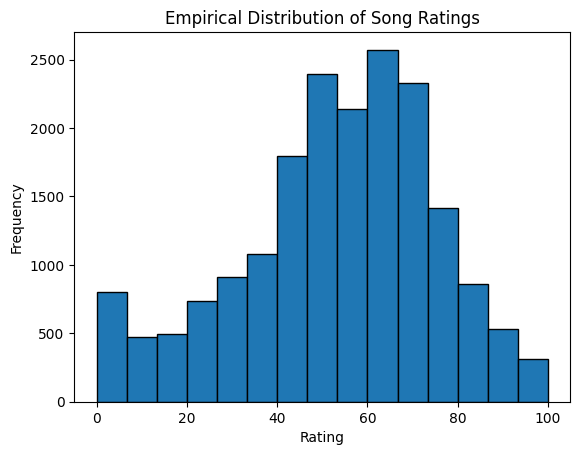

In [993]:
import matplotlib.pyplot as plt


bin_width = bins[1] - bins[0]
plt.bar(bins[:-1], empir_freqs, width=bin_width, edgecolor='black', align='edge')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Empirical Distribution of Song Ratings')
plt.show()

In [994]:
mu, sigma = ratings.mean(), ratings.std()
print(f'mu={mu}, sigma={sigma}')

mu=52.99187682505973, sigma=21.905654321614236


In [995]:
import scipy.stats as st


theor_freqs = []
for j in range(len(bins) - 1):
    p_j = st.norm.cdf(bins[j + 1], loc=mu, scale=sigma) - \
          st.norm.cdf(bins[j], loc=mu, scale=sigma)
    E_j = n * p_j
    theor_freqs.append(E_j)
theor_freqs = theor_freqs / np.sum(theor_freqs) * n

np.array(theor_freqs)

array([ 182.23044399,  345.14003266,  596.27889173,  939.69034601,
       1350.83594602, 1771.34843346, 2118.79873513, 2311.85314944,
       2300.99600451, 2089.08712898, 1730.14313228, 1307.04868449,
        900.70992184,  566.18782119,  324.65132827])

In [996]:
sum_empir = np.sum(empir_freqs)
sum_theor = np.sum(theor_freqs)
print(f'sum_equality={sum_empir == sum_theor}, sum_equals_check={sum_empir == n}, sum_empir={sum_empir}')

sum_equality=True, sum_equals_check=True, sum_empir=18835


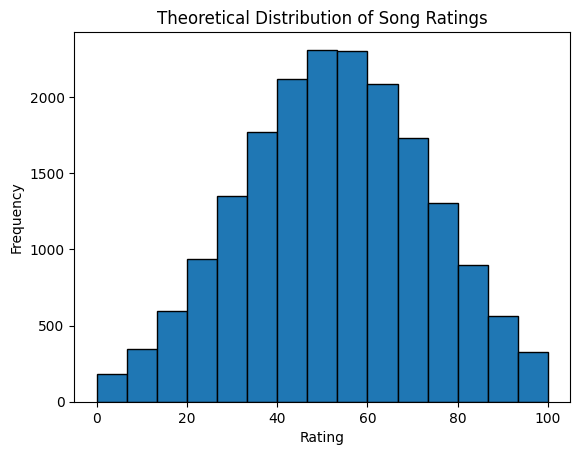

In [997]:
plt.bar(bins[:-1], theor_freqs, width=bin_width, edgecolor='black', align='edge')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Theoretical Distribution of Song Ratings')
plt.show()

In [998]:
chi2_score = np.sum((empir_freqs - theor_freqs) ** 2 / theor_freqs)
chi2_score

3026.907637036789

Эмпирически нашли матожидание и среднеквадратическое отклонение. Иными словами, мы оценили два параметра, а значит `p = 2` (потеря информации при оценивании параметра)

In [999]:
p = 2
df = (k - 1) - p
df

12

Смотрим в таблицу по `df` и `alpha=0.05`

In [1000]:
alpha = 0.05
crit_chi2 = 21.026
print(f'crit_chi2={crit_chi2}')

print_reject_or_accept(chi2_score > crit_chi2)

crit_chi2=21.026
Reject null hypothesis with respect to given alternative


In [1001]:
p_value = 1 - st.chi2.cdf(chi2_score, df)
p_value

0.0

In [1002]:
print_reject_or_accept(p_value < alpha)

Reject null hypothesis with respect to given alternative


Проверим библиотекой

In [1003]:
alpha = 0.05
chi2_score_, p_value = st.chisquare(empir_freqs, theor_freqs)
crit_chi2_ = st.chi2.ppf(1 - alpha, df)
print(f'chi2_score={chi2_score_}, p_value={p_value}, crit_chi2={crit_chi2_}')
print_reject_or_accept(p_value < alpha)

chi2_score=3026.907637036789, p_value=0.0, crit_chi2=21.02606981748307
Reject null hypothesis with respect to given alternative


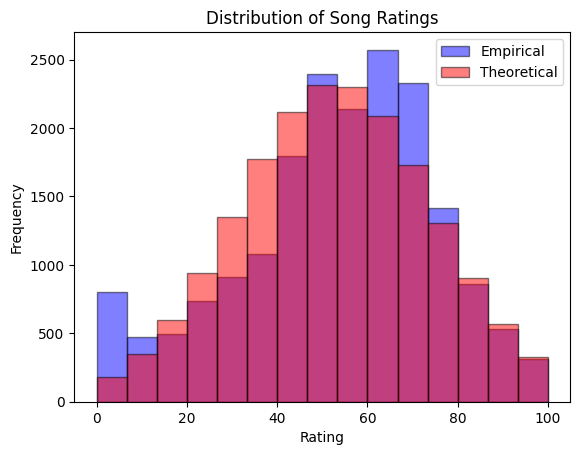

In [1004]:
plt.bar(bins[:-1], empir_freqs, width=bin_width, alpha=0.5, label="Empirical", color="blue", edgecolor='black', align='edge')
plt.bar(bins[:-1], theor_freqs, width=bin_width, alpha=0.5, label="Theoretical", color="red", edgecolor='black', align='edge')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Song Ratings')
plt.legend(loc='best')
plt.show()

Другой стат. тест

In [1036]:
alpha = 0.05
stat, p_value = st.kstest(ratings, 'norm', args=(mu, sigma), alternative='two-sided')
crit_d = np.sqrt(-0.5 * np.log(alpha / 2) / n)
print(f'stat={stat}, p_value={p_value}, crit_d={crit_d}')
print_reject_or_accept(p_value < alpha)

stat=0.06170357136267912, p_value=8.782641743221739e-63, crit_d=0.0098957661012103
Reject null hypothesis with respect to given alternative


2. H_0 -- распределения равны

In [1006]:
duration = data['song_duration_ms']

threshold = np.median(duration)
short_songs_ratings = ratings[duration <= threshold]
long_songs_ratings = ratings[duration > threshold]

print(f'len_short={len(short_songs_ratings)}, len_long={len(long_songs_ratings)}')

len_short=9419, len_long=9416


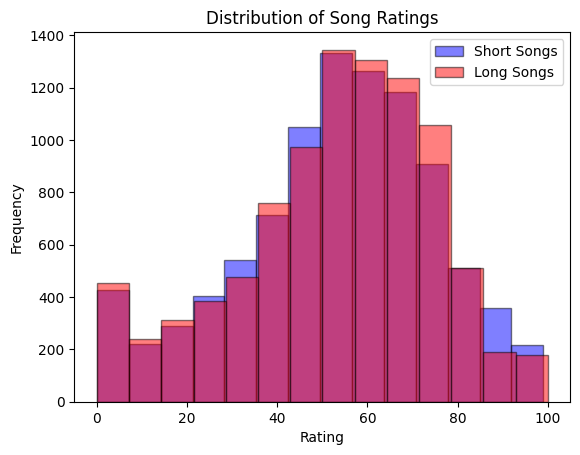

In [1007]:
n_bins = min(int(1 + np.floor(np.log2(len(short_songs_ratings)))), int(1 + np.floor(np.log2(len(long_songs_ratings)))))
plt.hist(short_songs_ratings, bins=n_bins, alpha=0.5, label="Short Songs", color='blue', edgecolor='black')
plt.hist(long_songs_ratings, bins=n_bins, alpha=0.5, label="Long Songs", color='red', edgecolor='black')

plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Song Ratings')
plt.legend(loc='best')
plt.show()

Пропускаем сортировку (создание вариационного ряда) благодаря функции `rankdata` 

In [1008]:
combined_ratings = np.concatenate((short_songs_ratings, long_songs_ratings))
ranks = st.rankdata(combined_ratings)
ranks

array([17362.5, 17362.5, 16867.5, ..., 13539.5, 12487.5,  9219.5])

In [1009]:
ranks_short = ranks[:len(short_songs_ratings)]
ranks_long = ranks[len(short_songs_ratings):]

r_short = np.sum(ranks_short)
r_long = np.sum(ranks_long)

print(f'R_short={r_short}, R_long={r_long}')

R_short=88207355.0, R_long=89180675.0


In [1010]:
m = len(short_songs_ratings)
n_ = len(long_songs_ratings)

u_short = m * n_ + 0.5 * m * (m + 1) - r_short
u_long = m * n_ + 0.5 * n_ * (n_ + 1) - r_long

u_score = min(u_short, u_long)
u_score

43843865.0

Для больших выборок статистика `U` распределена приблизительно нормально

In [1011]:
mean_u = m * n_ / 2
mean_u

44344652.0

In [1012]:
std_u = np.sqrt(m * n_ * (m + n_ + 1) / 12)
std_u

373112.106716824

In [1013]:
q_1_m_alpha_2 = 1.96
crit_u = mean_u - q_1_m_alpha_2 * std_u
crit_u

43613352.27083503

In [1014]:
print_reject_or_accept(u_score < crit_u)

Accept null hypothesis


In [1015]:
z_score = (u_score - mean_u) / std_u
p_value = 2 * (1 - st.norm.cdf(abs(z_score)))
p_value

0.17953469213683615

In [1016]:
print_reject_or_accept(p_value < alpha)

Accept null hypothesis


Проверим библиотекой

In [1017]:
u_score_, p_value = st.mannwhitneyu(short_songs_ratings, long_songs_ratings, alternative='two-sided')
crit_z = st.norm.ppf(1 - alpha / 2)
print(f'u_score={u_score_}, p_value={p_value}, crit_u={crit_z}')
print_reject_or_accept(p_value < alpha)

u_score=43843865.0, p_value=0.17948669975010156, crit_u=1.959963984540054
Accept null hypothesis


Другой статистический тест

In [1018]:
alpha = 0.05
stat, p_value = st.ks_2samp(short_songs_ratings, long_songs_ratings, alternative='two-sided')
crit_d = np.sqrt((-np.log(alpha / 2) / 2) * (1 / m + 1 / n_))
print(f'stat={stat}, p_value={p_value}, crit_d={crit_d}')
print_reject_or_accept(p_value < alpha)

stat=0.023314310821516877, p_value=0.011691247497192433, crit_d=0.019791532453470873
Reject null hypothesis with respect to given alternative


Поменяем уровень значимости

In [1019]:
alpha = 0.01
print_reject_or_accept(p_value < alpha)

Accept null hypothesis


3. H_0 -- не связаны

In [1020]:
danceability = data['danceability']

ranks_ratings = st.rankdata(ratings)
ranks_danceability = st.rankdata(danceability)

sum_ranks_ratings = np.sum(ranks_ratings)
sum_ranks_danceability = np.sum(ranks_danceability)

check = (n + 1) * n / 2
print(f'sum_equality={sum_ranks_ratings == sum_ranks_danceability}, sum_equals_check={sum_ranks_ratings == check}, sum={sum_ranks_ratings}')

sum_equality=True, sum_equals_check=True, sum=177388030.0


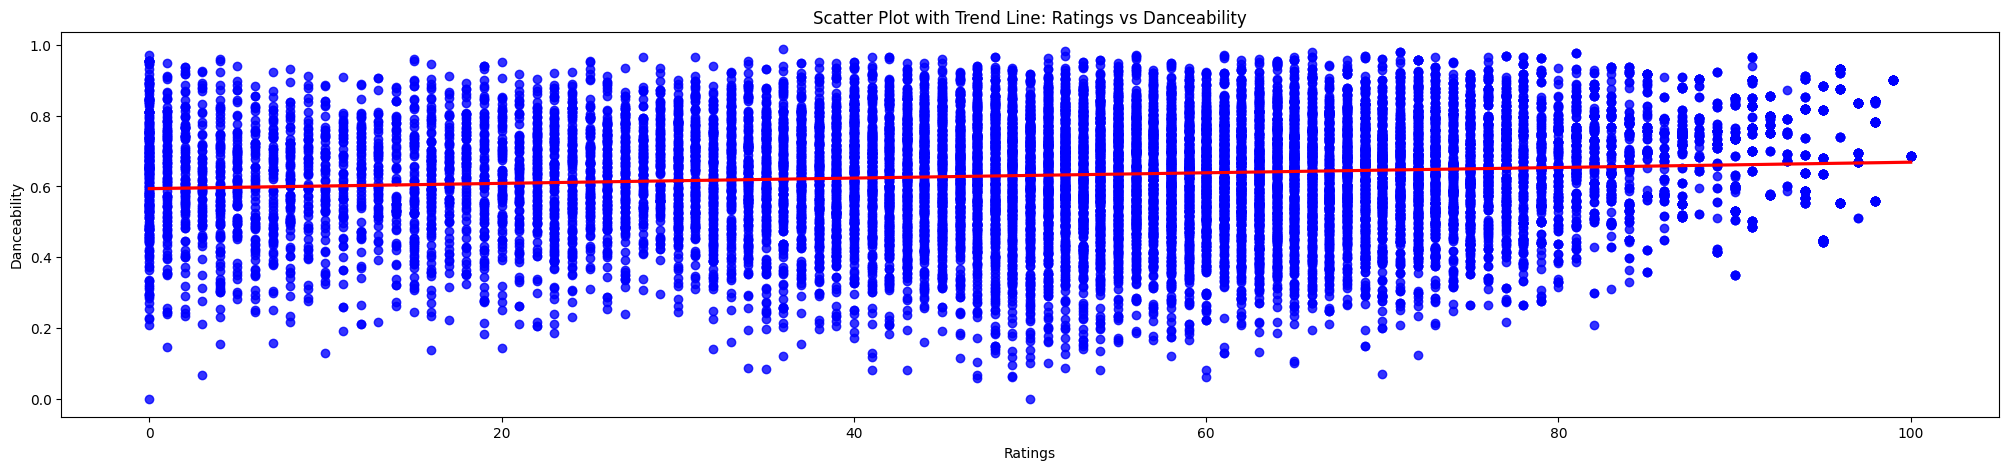

In [1021]:
import seaborn as sns


plt.figure(figsize=(25, 5))
sns.regplot(x=ratings, y=danceability, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

plt.title('Scatter Plot with Trend Line: Ratings vs Danceability')
plt.xlabel('Ratings')
plt.ylabel('Danceability')

plt.show()

In [1022]:
d = ranks_ratings - ranks_danceability
r_s = 1 - 6 * np.sum(d ** 2) / (n * (n ** 2 - 1))
r_s

0.10133749503700062

In [1023]:
t_score = r_s * np.sqrt((n - 2) / (1 - r_s ** 2))
t_score

13.978848382944223

Тест двусторонний (!)

In [ ]:
alpha = 0.01
crit_t = st.t.ppf(1 - alpha / 2, df)
crit_t

3.0545395893929017

In [1025]:
print_reject_or_accept(t_score > crit_t)

Reject null hypothesis with respect to given alternative


In [1026]:
df_ = n - 2
p_value = 2 * (1 - st.t.cdf(abs(t_score), df_))
p_value

0.0

In [1027]:
print_reject_or_accept(p_value < alpha)

Reject null hypothesis with respect to given alternative


Односторонний тест на положительную корреляцию (рейтинг растет с ростом танцевальности). H_1 -- корреляция положительна

In [1028]:
crit_t_one_sided = st.t.ppf(1 - alpha, df)
crit_t_one_sided

2.680997993130055

In [1029]:
print_reject_or_accept(t_score > crit_t)

Reject null hypothesis with respect to given alternative


In [1030]:
p_value_one_sided = 1 - st.t.cdf(abs(t_score), df)
p_value_one_sided

4.339782644358081e-09

In [1031]:
print_reject_or_accept(p_value < alpha)

Reject null hypothesis with respect to given alternative


Проверка библиотекой

Крит t как приближение z

In [1032]:
rho, p_value = st.spearmanr(ratings, danceability, alternative='two-sided')
crit_z = st.norm.ppf(1 - alpha / 2)
print(f'r_s={rho}, p_value={p_value}, crit_t={crit_z}')
print_reject_or_accept(p_value < alpha)

r_s=0.10123555201396331, p_value=4.251510400487118e-44, crit_t=2.5758293035489004
Reject null hypothesis with respect to given alternative


In [1033]:
rho, p_value = st.spearmanr(ratings, danceability, alternative='greater')
crit_z = st.norm.ppf(1 - alpha)
print(f'r_s={rho}, p_value={p_value}, crit_t={crit_z}')
print_reject_or_accept(p_value < alpha)

r_s=0.10123555201396331, p_value=2.125755200243559e-44, crit_t=2.3263478740408408
Reject null hypothesis with respect to given alternative


Другой стат. тест (крит. знач. тоже z)

In [1034]:
tau, p_value = st.kendalltau(ratings, danceability, alternative='two-sided')
crit_z = st.norm.ppf(1 - alpha / 2)
print(f'tau={tau}, p_value={p_value}, crit_z={crit_z}')
print_reject_or_accept(p_value < alpha)

tau=0.06841180008844917, p_value=2.255916082084472e-44, crit_z=2.5758293035489004
Reject null hypothesis with respect to given alternative


In [1035]:
tau, p_value = st.kendalltau(ratings, danceability, alternative='greater')
crit_z = st.norm.ppf(1 - alpha)
print(f'tau={tau}, p_value={p_value}, crit_z={crit_z}')
print_reject_or_accept(p_value < alpha)

tau=0.06841180008844917, p_value=1.127958041042236e-44, crit_z=2.3263478740408408
Reject null hypothesis with respect to given alternative
